# **Match Report Generator**

## Run the Bottom Cell first. Then use the first ones to find the match you want.

### Then run the match_report cell

In [1]:
from statsbombpy import sb
import pandas as pd
pd.options.display.max_rows = 500

In [29]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [4]:
sb.matches(competition_id=43, season_id=51)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3888720,1974-07-07,18:00:00.000,International - FIFA World Cup,1974,Netherlands,Germany,1,2,available,...,None,7,Final,Olympiastadion München,Jack Taylor,Rinus Michels,Helmut Schön,1.1.0,2,2
1,3888719,1974-07-03,21:30:00.000,International - FIFA World Cup,1974,Netherlands,Brazil,2,0,available,...,None,6,1st Group Stage,Signal-Iduna-Park,Kurt Tschenscher,Rinus Michels,Mário Jorge Lobo Zagallo,1.1.0,2,2
2,3888718,1974-06-30,18:00:00.000,International - FIFA World Cup,1974,German DR,Netherlands,0,2,available,...,None,5,1st Group Stage,Parkstadion Obenende,Rudolf Scheurer,Georg Buschner,Rinus Michels,1.1.0,2,2
3,3888717,1974-06-26,21:30:00.000,International - FIFA World Cup,1974,Netherlands,Argentina,4,0,available,...,None,4,1st Group Stage,Parkstadion Obenende,Bobby Davidson,Rinus Michels,Vladislao Wenceslao Cap,1.1.0,2,2
4,3888716,1974-06-19,21:30:00.000,International - FIFA World Cup,1974,Netherlands,Sweden,0,0,available,...,None,2,1st Group Stage,Signal-Iduna-Park,Werner Winsemann,Rinus Michels,,1.1.0,2,2
5,3750180,1974-06-22,19:30:00.000,International - FIFA World Cup,1974,German DR,Germany,1,0,available,...,2021-06-13T16:17:31.694,3,1st Group Stage,Volksparkstadion,Ramón Ivanoes Barreto Ruiz,Georg Buschner,Helmut Schön,1.1.0,2,2


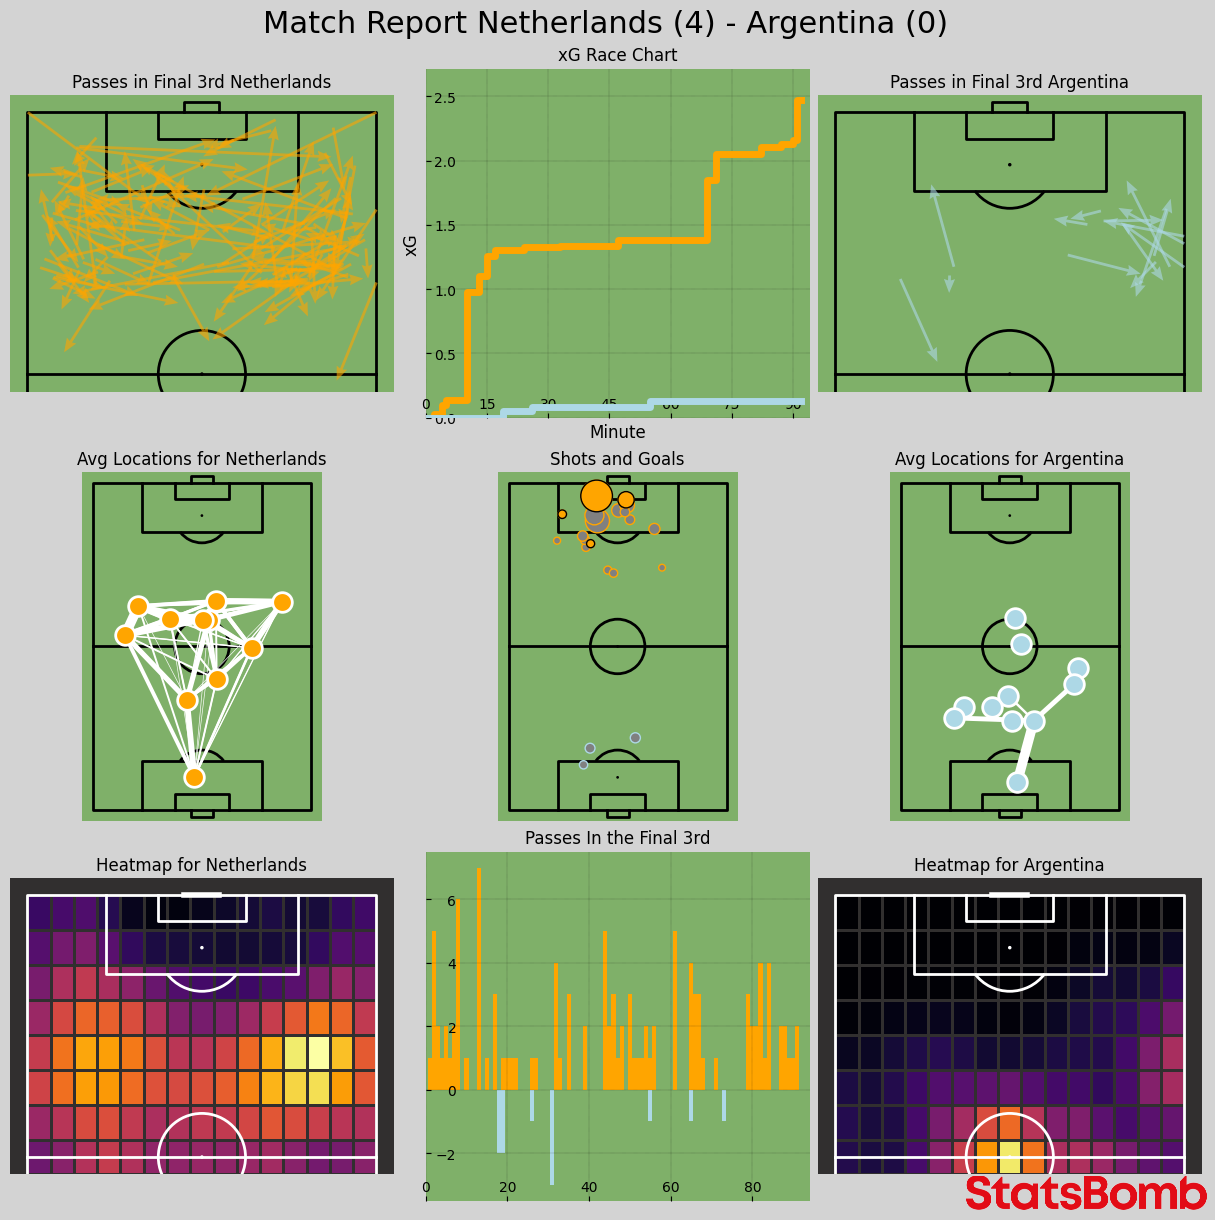

In [7]:
match_report(matchId=3888717, # Statsbomb match id
            home_team = "Netherlands", # home team
            away_team = 'Argentina', # away team
            save='y', #'y' for save 'n' for dont
            home_team_color ='orange', # color for the home team
            away_team_color = 'lightblue' # color for the away team
            )

In [3]:
def match_report(matchId, home_team, away_team, save, home_team_color, away_team_color):
    
    from statsbombpy import sb

    import pandas as pd
    import numpy as np


    from mplsoccer.pitch import Pitch
    from matplotlib.colors import to_rgba
    from mplsoccer import Pitch, VerticalPitch, Sbopen


    import matplotlib.gridspec as gridspec
    import matplotlib.pyplot as plt

    import warnings

    from PIL import Image

    from highlight_text import HighlightText, ax_text, fig_text
    from scipy import stats


    from highlight_text import htext

    from scipy.ndimage import gaussian_filter

    parser = Sbopen()
    match = matchId
    match_files = [match]
    df = pd.concat([parser.event(file)[0] for file in match_files])
    lineups = parser.lineup(match)
    
    pitchColor = "#7FB069"
    figColor = "#7FB069"
    linesColor = "black"
    home_teamColor = home_team_color
    away_teamColor = away_team_color

    warnings.filterwarnings("ignore")

    
    im = Image.open("sb_text_logo.png")
    
    
    short_names = lineups[['player_id', 'player_nickname', 'jersey_number']]
    
    df = df.merge(short_names, on='player_id')
    
    df = df[df['period']<5]
    
    df.drop('player_name',axis=1, inplace=True)
    
    shots = df[df.type_name == "Shot"]

    shots = shots[['team_name', 'player_nickname','jersey_number', 'minute', 'second',"x","y",
                   'shot_statsbomb_xg', 'outcome_name', "type_name", "id"]]

    shots = shots.sort_values('minute', ascending=True).reset_index()

    goals = shots[shots.outcome_name == 'Goal']
    
    fig = plt.figure(figsize=(12,12),constrained_layout = True)
    fig.set_facecolor("lightgrey")
    gs = fig.add_gridspec(nrows =3, ncols =3)
    
    
    home_team_shots = shots[shots["team_name"]== home_team]
    home_team_goals = home_team_shots[home_team_shots["outcome_name"]=="Goal"]
    home_goals_count = home_team_goals.count()['index']

    away_team_shots = shots[shots["team_name"]== away_team]
    away_team_goals = away_team_shots[away_team_shots["outcome_name"]=="Goal"]

    away_goals_count = away_team_goals.count()['index']
    
    
    a_xG = [0]
    h_xG = [0]
    a_min = [0]
    h_min = [0]
    h_min_goals = []
    a_min_goals = []
    h_goals = []

    for i in range(len(shots['shot_statsbomb_xg'])):
            if shots['team_name'][i]==home_team:
                h_xG.append(shots['shot_statsbomb_xg'][i])
                h_min.append(shots['minute'][i])

                if shots['outcome_name'][i]=='Goal':
                    h_min_goals.append(shots['minute'][i])

            if shots['team_name'][i]==away_team:
                a_xG.append(shots['shot_statsbomb_xg'][i])
                a_min.append(shots['minute'][i])

                if shots['outcome_name'][i]=='Goal':
                    a_min_goals.append(shots['minute'][i])


    ### Function cumulative add xG values xG. Goes through the list and adds the xG values together
    def nums_cumulative_sum(nums_list):
        return [sum(nums_list[:i+1]) for i in range(len(nums_list))]


     ### Apply defned nums_cumulative_sum function to the home and away xG lists
    h_cumulative = nums_cumulative_sum(h_xG)
    a_cumulative = nums_cumulative_sum(a_xG)


    ### Find the total xG. Create a new variable from the last item in the cumulative list
    hlast = h_cumulative[-1]
    alast = a_cumulative[-1]

    ### Determine the final cumulative xG (used for the title)
    h_final_xg = round(float(hlast), 2)
    a_final_xg = round(float(alast), 2)

    ### Determine the last minute
    last_min = max(df['minute'])


    ### Append last minute to list
    h_min.append(last_min)
    a_min.append(last_min)


    ### Append last (final) xG to 
    h_cumulative.append(hlast)
    a_cumulative.append(alast)


    ### Determine the maximum xG (used to determine the height of the y-axis)
    xg_max = max(alast, hlast)


    ### Create lists of the time and cumulative xG at the time Away goals were scored

    #### Empty list for the indexes of Away goals
    a_goals_indexes = []

    #### Create list of the indexes for Away goals
    for i in range(len(a_min)):
        if a_min[i] in a_min_goals:
            a_goals_indexes.append(i)

    #### Empty list for the cumulative xG at the moment Away goals are scored
    a_cumulative_goals = []

    #### Create list of the cumulative xG at the moment Away goals are scored
    for i in a_goals_indexes:
        a_cumulative_goals.append(a_cumulative[i])


    ### Create lists of the time and cumulative xG at the time Home goals were scored
     #### Empty list for the indexes of Home goals
    h_goals_indexes = []

        #### Create list of the indexes for Home goals
    for i in range(len(h_min)):
        if h_min[i] in h_min_goals:
            h_goals_indexes.append(i)

    #### Empty list for the cumulative xG at the moment Home goals are scored
    h_cumulative_goals = []

    #### Create list of the cumulative xG at the moment Home goals are scored
    for i in h_goals_indexes:
        h_cumulative_goals.append(h_cumulative[i])
        
        
    passes = df[df.type_name == "Pass"]
    passes = passes[(passes["type_name"]!="Kick Off") & (passes["type_name"]!="Goal Kick") 
                    & (passes["type_name"]!="Free Kick") & (passes["type_name"]!="Throw-in") 
                    & (passes["type_name"]!="Corner") & (passes["outcome_name"]!="Incomplete") 
                    & (passes["outcome_name"]!='Pass Offside') & (passes["outcome_name"]!="Out") 
                    & (passes["outcome_name"]!="Unknown")]

    passes = passes[['team_name', 'player_nickname','jersey_number', "player_id", 'minute', 'second', 'x',"y", "type_name", "outcome_name",
                         "end_x","end_y",'pass_shot_assist', "type_name", 'pass_recipient_name']]
    passes = passes.reset_index()

    
    avg_h = passes.copy()

    subs_h = df[df["team_name"] ==home_team]
    subs_h = subs_h[subs_h["type_name"] =='Substitution']
    subs_h = subs_h["minute"]
    firstSub_h = subs_h.min()

    avg_h = avg_h[avg_h["minute"]<firstSub_h]


    avg_h = avg_h[avg_h['team_name']==home_team]
    avg_h["passer"] = avg_h["player_nickname"]
    avg_h["recipient"] = avg_h["pass_recipient_name"]

    average_locations_h = avg_h.groupby(["passer"]).agg({"x":["mean"], "y": ["mean", "count"]})
    average_locations_h.columns = ["x","y", "count", ]
    
    
    
    pass_between_h = avg_h.groupby(["passer", "recipient"]).player_id.count().reset_index()
    pass_between_h.rename({"player_id": "pass_count"},axis="columns", inplace=True)

    pass_between_h = pass_between_h.merge(average_locations_h, left_on="passer", right_index = True)
    pass_between_h = pass_between_h.merge(average_locations_h, left_on="recipient", right_index = True, suffixes=["","_end"])





    MAX_LINE_WIDTH = 7
    MAX_MARKER_SIZE = 800

    pass_between_h['width'] = (pass_between_h.pass_count / pass_between_h.pass_count.max() *
                               MAX_LINE_WIDTH)
    average_locations_h['marker_size'] = (average_locations_h['count']
                                             / average_locations_h['count'].max() * MAX_MARKER_SIZE)

    MIN_TRANSPARENCY = 0.7
    color = np.array(to_rgba('white'))
    color = np.tile(color, (len(pass_between_h), 1))
    c_transparency = pass_between_h.pass_count / pass_between_h.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency
    
    
    
    
    avg_a = passes.copy()

    subs_a = df[df["team_name"] ==away_team]
    subs_a = subs_a[subs_a["type_name"] =='Substitution']
    subs_a = subs_a["minute"]
    firstSub_a = subs_a.min()

    avg_a = avg_a[avg_a["minute"]<firstSub_a]


    avg_a = avg_a[avg_a['team_name']==away_team]
    avg_a["passer"] = avg_a["player_nickname"]
    avg_a["recipient"] = avg_a["pass_recipient_name"]

    average_locations_a = avg_a.groupby(["passer"]).agg({"x":["mean"], "y": ["mean", "count"]})
    average_locations_a.columns = ["x","y", "count", ]
    
    pass_between_a = avg_a.groupby(["passer", "recipient"]).player_id.count().reset_index()
    pass_between_a.rename({"player_id": "pass_count"},axis="columns", inplace=True)

    pass_between_a = pass_between_a.merge(average_locations_a, left_on="passer", right_index = True)
    pass_between_a = pass_between_a.merge(average_locations_a, left_on="recipient", right_index = True, suffixes=["","_end"])


    pass_between_a['width'] = (pass_between_a.pass_count / pass_between_a.pass_count.max() *
                               MAX_LINE_WIDTH)
    average_locations_a['marker_size'] = (average_locations_a['count']
                                             / average_locations_a['count'].max() * MAX_MARKER_SIZE)

    MIN_TRANSPARENCY = 0.7
    color = np.array(to_rgba('white'))
    color = np.tile(color, (len(pass_between_a), 1))
    c_transparency = pass_between_a.pass_count / pass_between_a.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency
    
    xT = pd.read_csv("xT_grid.csv", header=None)
    xT = np.array(xT)
    xT_rows, xT_cols = xT.shape
    
    passes["x1_bin"] =pd.cut(passes["x"], bins =xT_cols, labels=False)
    passes["y1_bin"] =pd.cut(passes["y"], bins =xT_rows, labels=False)
    passes["x2_bin"] =pd.cut(passes["end_y"], bins =xT_cols, labels=False)
    passes["y2_bin"] =pd.cut(passes["end_x"], bins =xT_rows, labels=False)

    passes["start_zone_value"] = passes[["x1_bin", "y1_bin"]].apply(lambda x: xT[x[1]][x[0]],axis=1)
    passes["end_zone_value"] = passes[["x2_bin", "y2_bin"]].apply(lambda x: xT[x[1]][x[0]],axis=1)

    passes["xT"] = passes["end_zone_value"] - passes["start_zone_value"]
    
    
    
    final_3rd = passes[passes['x']>=80]
    final_3rd_h = final_3rd[final_3rd['team_name']==home_team]
    final_3rd_h = final_3rd_h[final_3rd_h['x']>=80]
    final_3rd_a = final_3rd[final_3rd['team_name']==away_team]
    final_3rd_a = final_3rd_a[final_3rd_a['x']>=80]
    passes_in_final_3rd = passes[passes['x']>=80]
    passes_in_final_3rd = passes_in_final_3rd[passes_in_final_3rd['end_x']>=80]
    passes_in_final_3rd_h = passes_in_final_3rd[passes_in_final_3rd['team_name']==home_team]

    passes_in_final_3rd_a = passes_in_final_3rd[passes_in_final_3rd['team_name']==away_team]
    final_3rd_h_index = passes_in_final_3rd_h.groupby('minute').count()[['index']].reset_index()

    final_3rd_a_index = passes_in_final_3rd_a.groupby('minute').count()[['index']].reset_index()
    final_3rd_a_index['index'] = -abs(final_3rd_a_index['index'])

        # Agg xT for home team
    agg_xt_h = passes[passes['team_name']==home_team]
    agg_xt_h = (agg_xt_h.groupby(['player_nickname','jersey_number', "team_name"]).agg({'xT':'sum'}).reset_index())
    agg_xt_h = agg_xt_h.sort_values(by =["xT"], ascending =False)
    agg_xt_h = agg_xt_h.head(5)
    agg_xt_h = agg_xt_h.reset_index(drop=True)

    player_h = agg_xt_h['player_nickname']
    value_h = agg_xt_h['xT']


    # Agg xT for away team
    agg_xt_a = passes[passes['team_name']==away_team]
    agg_xt_a = (agg_xt_a.groupby(['player_nickname','jersey_number', "team_name"]).agg({'xT':'sum'}).reset_index())
    agg_xt_a = agg_xt_a.sort_values(by =["xT"], ascending =False)
    agg_xt_a = agg_xt_a.head(5)
    agg_xt_a = agg_xt_a.reset_index(drop=True)

    player_a = agg_xt_a['player_nickname']
    value_a = agg_xt_a['xT']
    
    
    home_passes = passes[passes['team_name']==home_team]
    away_passes = passes[passes['team_name']==away_team]
    
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box", half=True)

    
    away_team_shots['x'] = pitch.dim.right - away_team_shots.x
    away_team_goals['x'] = pitch.dim.right - away_team_goals.x

    
    
    bin_statistic_h = pitch.bin_statistic(home_passes.x, home_passes.y, statistic='count', bins=(15, 15))
    bin_statistic_h['statistic'] = gaussian_filter(bin_statistic_h['statistic'], 1)


    bin_statistic_a = pitch.bin_statistic(away_passes.x, away_passes.y, statistic='count', bins=(15, 15))
    bin_statistic_a['statistic'] = gaussian_filter(bin_statistic_a['statistic'], 1)
    

    fig.suptitle(f'Match Report {home_team} ({home_goals_count}) - {away_team} ({away_goals_count})', fontsize=22)


    ax1 = fig.add_subplot(gs[0,0])
    ax1.set_title('[0,0]')
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box", half=True)
    pitch.draw(ax1)

    scatter_shots_h = pitch.arrows(final_3rd_h.x, final_3rd_h.y, xend=final_3rd_h.end_x, yend=final_3rd_h.end_y,
                                   alpha = 0.6, ax=ax1, color=home_teamColor, width=2, headwidth=4)
    ax1.set_title(f'Passes in Final 3rd {home_team}')



    ax2 = fig.add_subplot(gs[0,1])

    ax2.set_title('xG Race Chart')
    ax2.step(x=h_min, y=h_cumulative, linewidth=5, where='post', color= home_teamColor)
    ax2.step(x=a_min, y=a_cumulative, linewidth=5, where='post', color=away_teamColor)
    ax2.set_xlabel('Minute', color='black', fontsize=12)
    ax2.set_ylabel('xG', color='black', fontsize=12)
    ax2.set_xticks([0, 15, 30, 45, 60, 75, 90])
    ax2.set_xlim([0, last_min+2])
    ax2.set_ylim([0, xg_max*1.1])

    ax2.grid(linestyle='dotted',
            linewidth=0.25,
            color='black',
                zorder=1
               )
    ax2.patch.set_facecolor(pitchColor)
    ax2.spines[['right', 'top', 'left','bottom']].set_visible(False)
    ax2.tick_params(axis="y",direction="in", pad=-22)
    ax2.tick_params(axis="x",direction="in", pad=-15)



    ax3 = fig.add_subplot(gs[0,2])
    ax3.set_title('[0,2]')
    ax3.set_title('[0,0]')
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box", half=True)
    pitch.draw(ax3)

    scatter_shots_h = pitch.arrows(final_3rd_a.x, final_3rd_a.y, xend=final_3rd_a.end_x, yend=final_3rd_a.end_y,
                                   alpha = 0.6, ax=ax3, color=away_teamColor, width=2, headwidth=4)
    ax3.set_title(f'Passes in Final 3rd {away_team}')







    ax4 = fig.add_subplot(gs[1,0])
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box",)
    pitch.draw(ax4)
    ax4.set_title(f'Avg Locations for {home_team}')
    
    pass_lines_h = pitch.lines(pass_between_h.x, pass_between_h.y, pass_between_h.x_end, pass_between_h.y_end,
                             lw=pass_between_h.width, color="white", zorder=1, ax=ax4)

    pass_nodes_h = pitch.scatter(average_locations_h.x, average_locations_h.y,s=200, color=home_teamColor,
                               edgecolors='#FFFFFF', linewidth=2, alpha=1, ax=ax4)




    ax5 = fig.add_subplot(gs[1,1])
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box",)
    pitch.draw(ax5)


    ax5.set_title('Shots and Goals')
    scatter_shots_h = pitch.scatter(home_team_shots.x, home_team_shots.y, s=(home_team_shots.shot_statsbomb_xg * 600) + 20,
                                    c= 'grey', alpha = 1, ax=ax5, edgecolor=home_teamColor)
    
    scatter_goals_h = pitch.scatter(home_team_goals.x, home_team_goals.y, s=(home_team_goals.shot_statsbomb_xg * 600) + 20,
                                    c= home_teamColor, alpha = 1, ax=ax5,edgecolor='black')

    scatter_shots_a = pitch.scatter(away_team_shots.x, away_team_shots.y, s=(away_team_shots.shot_statsbomb_xg * 600) + 20,
                                    c= 'grey', alpha = 1, ax=ax5, edgecolor=away_teamColor)

    scatter_goals_a = pitch.scatter(away_team_goals.x, away_team_goals.y, s=(away_team_goals.shot_statsbomb_xg * 600) + 20,
                                    c= away_teamColor,  alpha = 1, ax=ax5, edgecolor='black')



    ax6 = fig.add_subplot(gs[1,2])
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box")
    pitch.draw(ax6)
    ax6.set_title(f'Avg Locations for {away_team}')
    pass_lines_a = pitch.lines(pass_between_a.x, pass_between_a.y,
                             pass_between_a.x_end, pass_between_a.y_end, lw=pass_between_a.width,
                             color="white", zorder=1, ax=ax6)

    pass_nodes_a = pitch.scatter(average_locations_a.x, average_locations_a.y,
                               s=200, color=away_teamColor, edgecolors='#FFFFFF', linewidth=2, alpha=1, ax=ax6)


    ax7 = fig.add_subplot(gs[2,0])
    ax7.set_title(f'Heatmap for {home_team}')

    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#312F2F',  line_color='white', line_zorder=2, half=True)
    ax = pitch.draw(ax7)
    pcm_h = pitch.heatmap(bin_statistic_h, ax=ax7, cmap='inferno', edgecolors='#312F2F')



    ax8 = fig.add_subplot(gs[2,1])
    ax8.set_title('Passes In the Final 3rd')
    ax8.bar(final_3rd_h_index['minute'], final_3rd_h_index['index'], width=1, color=home_teamColor)
    ax8.bar(final_3rd_a_index['minute'], final_3rd_a_index['index'], width=1, color=away_teamColor)
    ax8.set_xlim(0,last_min+2)
    ax8.patch.set_facecolor(pitchColor)
    ax8.spines[['right', 'top', 'left','bottom']].set_visible(False)

    ax8.grid(linestyle='dotted',
            linewidth=0.25,
            color='black',
                zorder=1
               )
    ax8.tick_params(axis="y",direction="in", pad=-22)
    ax8.tick_params(axis="x",direction="in", pad=-15)

    ax9 = fig.add_subplot(gs[2,2])
    ax9.set_title(f'Heatmap for {away_team}')

    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#312F2F',  line_color='white', line_zorder=2, half=True)
    ax = pitch.draw(ax9)
    pcm_a = pitch.heatmap(bin_statistic_a, ax=ax9, cmap='inferno', edgecolors='#312F2F')

    ax10 = fig.add_axes([0.80, -0.040, 0.20, 0.10])
    ax10.axis('off')
    ax10.imshow(im)

    
    if save =='y':
        plt.savefig(f'viz/Post Match Report {home_team} v {away_team}.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        plt.show()